# THE LANGUAGE of LIFE EXPECTANCY: 

#### A Natural Language Processing Evaluation of GitHub Repository Content Programming Language

---

**Natural Language Processing Project & Final Report Created By:**  

Chris Teceno, Rachel Robbins-Mayhill, Kristofer Rivera     
  Codeup     **|**     Innis Cohort     **|**     May 2022  

<img src='languages.png' width="1500" height="700" align="center"/>

Rubric (total 50 points):

- 10 points: Overall documentation and code style
- 10 points: Data from at least 100 repos is gathered in a reproducible manner
- 10 points: Data is prepared into a format that can be worked with further
- 10 points: Data Exploration is performed, hypothesis are tested and visualizations are created
- 10 points: Different methods of data preprocessing and different types of models are evaluated with a chosen evaluation metric for predicting repo language from README content.

## Project Goal
The goal of this project is to build a Natural Language Processing (NLP) model that can predict the programming language of projects within specified GitHub repositories, given the text of a README.md file. 

## Project Description

This project was initiated by utilizing web scraping techniques to scrape README files from specified GitHub repositories focused on Life Expectancy projects. The 130 most starred Life Expectancy Repositories, as of May 14, 2022, were used as the documents within the corpus for this NLP project.

After acquiring and preparing the corpus, our team conducted natural language processing exploration methods such as word clouds, bigrams and trigrams. We employed multiclass classification methods to create multiple machine learning models. The end goal was to create an NLP model that accurately predicted the programming language used in a GitHub repository based on the words and word combinations found in the readme files.

## Initial Thoughts & Hypothesis: 



## Initial Questions:

- 1. What are the most frequently occuring words?
- 2. Are there any words that uniquely identify one of the coding langauges?
- 3. What are the most frequently occuring bigrams (pairs of words)?
- 4. Are there any bigrams that uniquely identify one of the coding langauges?
- 5. Is word count within the README significantly different between the top 4 programming langauges?

## EXECUTIVE SUMMARY

===============================================================================================================================================

## I. ACQUIRE

### Note about imports:

Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import json
import requests
import wrangle
from env import github_token, github_username

# import for data manipulation
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire data from .json saved and processed using functions found in wrangle.py
df = pd.read_json("data.json")
df.head()

,repo,language,readme_contents
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github..."


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(166, 3)

## The Original DataFrame Size: 166 rows, or documents, and 3 columns.

=================================================================================================================================================================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the prep_data  function saved within the prepare.py file inside the 'NLP-Project' repository on GitHub. The function takes in the original data.json dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Basic Cleaning: 
    - Make all text lowercase
    - Normalize, encode, and decode to remove accented text and special characters
    - Tokenize strings to break words and punctuation into discrete units
    - Stem and Lemmatize words to acquire base words
    - Remove stopwords
    - Rename columns
---   
- Address missing values, data errors, unnecessary data, and unclear values:
    - Replace Jupyter Notebook values with Python after manually verifying most Jupyter Notebook entires used the Python programming language. 
    - Drop missing values (# in ______ and # in _______) to prevent impediments in exploration and modeling 
---    
- Create feature engineered columns:
    - unique words
    - character count
    - word count
    - unique word count
    - most common word count (2nd, 3rd, 4th, 5th most common)

---
- Split corpus into train, validate, and test samples

**Note on Missing Value Handling:**
The missing value removal equated to removing     observations/documents, which was about ___\% of the data set. It still left a substantial number of observations, above 100. If given more time with the data, it is recommended to _______.

---

### Results of Data Preparation

In [4]:
# import for prepare
import prepare

In [5]:
# apply the data preparation observations and tasks to clean the data using the prep_data function found in the prepare.py
df = prepare.prep_data(df)
# view first few rows of dataframe
df.head().T

,0,1,2,3,4
repo,mcastrolab/Brazil-Covid19-e0-change,jschoeley/de0anim,sychi77/Thoracic_Surgery_Patient_Survival,ashtad63/HackerRank-Data-Scientist-Hiring-Test,OxfordDemSci/ex2020
language,R,R,Python,Python,R
original,# Reduction in life expectancy in Brazil after...,# Animated annual changes in life-expectancy\n...,# Thoracic Surgery for Lung Cancer Data Set\n ...,# HackerRank Data Scientist Hiring Test: Predi...,"<p align=""center"">\n <img src=""https://github..."
more_clean,reduction life expectancy brazil covid provide...,animated annual change lifeexpectancy illustra...,thoracic surgery lung cancer data set uci mach...,hackerrank data scientist hiring test predict ...,p aligncenter img srchttpsgithubcomoxforddemsc...
unique_words,211,16,150,86,172
char_count,2949,166,2058,1011,2259
word_count,352,16,234,135,234
unique_word_count,211,16,150,86,172
most_common_word,life,animated,surgery,country,data
2nd_most_common_word,expectancy,annual,f,life,relates


In [6]:
# obtain the number of rows and columns for the updated/cleaned dataframe. 
df.shape

(166, 13)

## Prepared DataFrame Size: 166 rows, or documents, and 13 columns.

---

### PREPARE - SPLIT

In [7]:
# import for split
from sklearn.model_selection import train_test_split

After preparing the corpus, it was split into 3 samples; train, validate, and test using:

- Random State: 42
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the prepare.py file inside the [NLP-Project](https://github.com/Two-Guys-and-a-Gal/NLP-Project) repository on GitHub.

In [8]:
# split the data into train, validate, and test using the split_data function found in the prepare.py
#train, validate, test = prepare.split_data(df)

In [9]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

In [10]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((92, 13), (40, 13), (34, 13))

=================================================================================================================================================================================================================================

## III. EXPLORE

In [28]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import style
from wordcloud import WordCloud

In [30]:
# Set Universal Visualization Formatting

# determine figure size
plt.rc('figure', figsize=(20, 8))
# determine font size
plt.rc('font', size=15)
# determine style
plt.style.use('seaborn-deep')

After acquiring and preparing the corpus, exploration was conducted. All univariate exploration was completed on the entire cleaned corpus in the workbook for this project. For the purpose of the final report, only the target variable will be displayed in order to reduce noise and provide focused context for the project. Following univariate exploration, the corpus was split into train, validate, and test samples, where only the train set was used for bivariate and multivariate exploration to prevent data leakage.

---

### UNIVARIATE EXPLORATION

#### UNIVARIATE EXPLORATION of TARGET VARIABLE

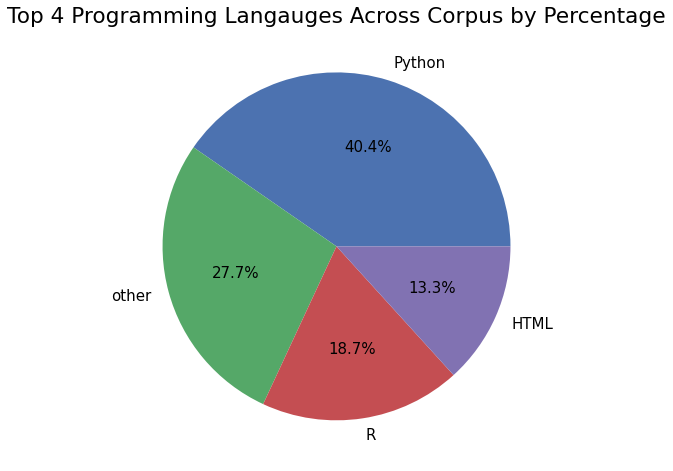

In [24]:
# create visualization
df.language.value_counts().plot(kind='pie', y='Language', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Top 4 Programming Langauges Across Corpus by Percentage')
plt.show()

**OBSERVATIONS:** 
- Python is the most common language, represented by 40\% of the corpus, followed by other at 28\%, R at 19\%, and HTML at 13\%. 


---

### EXPLORATION

All bivariate exploration was conducted on the train corpus to prevent data leakage. The initial questions and univariate exploration guided the bivariate exploration.

#### EXPLORE QUESTIONS

- 1. What are the most frequently occuring words?
- 2. Are there any words that uniquely identify one of the coding langauges?
- 3. What are the most frequently occuring bigrams (pairs of words)?
- 4. Are there any bigrams that uniquely identify one of the coding langauges?
- 5. Is word count within the README significantly different between the top 4 programming langauges?

### QUESTION 1: Most Frequent Words
What are the most frequently occuring words?

#### ANSWER 1: Most Frequent Words

---

### QUESTION 2: Unique Words
Are there any words that uniquely identify one of the coding langauges?

#### ANSWER 2: Unique Words

---

### QUESTION 3: Most Frequent Bigrams (Word Pairs)
What are the most frequently occuring bigrams (pairs of words)?

#### ANSWER 3: Most Frequent Bigrams 

---

### QUESTION 4: Unique Bigrams
Are there any bigrams that uniquely identify one of the coding langauges?

#### ANSWER 4: Unique Bigrams

---

### QUESTION 5: Word Count
Is word count within the README significantly different between the top 4 programming langauges?

---

#### Statistical Testing

- $H_0$: Mean word count of README documents for Python Programming <= Mean word count of README documents for all other programming languages.
- $H_α$: Mean word count of README documents for Python Programming > Mean word count of README documents for all other programming languages.

#### ANSWER 5: Word Counts

---

### EXPLORATION SUMMARY

#### EXPLORE QUESTIONS

- 1. What are the most frequently occuring words?
- 2. Are there any words that uniquely identify one of the coding langauges?
- 3. What are the most frequently occuring bigrams (pairs of words)?
- 4. Are there any bigrams that uniquely identify one of the coding langauges?
- 5. Is word count within the README significantly different between the top 4 programming langauges?

=================================================================================================================================================================================================================================

## IV. MODEL

In [16]:
# Import for modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

### MODELING CONFUSION MATRIX

- True Positive: number of occurrences where programming language is true and programming language is predicted true.
    - 
- True Negative: number of occurrences where programming language is false and programming language is predicted false.
    - 
- False Positive: number of occurrences where programming language is false and programming language is predicted true.
    - 
- False Negative: number of occurrences where programming language is true and programming language is predicted false.
    - 

Because programming language is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training data and the models were evaluated on validate data. The best model was selected using accuracy, but also with an eye for recall. In other words, the model was optimized for identifying true positives (actual language when predicted), and false negatives (__________).

### MODEL - SCALE
_________________________

### Set X & y

In [17]:
# create X & y version of train, where y is a series with just the target variable, language, and X is the more_clean column. 
# make vectorizer
tfidf = TfidfVectorizer()
# fit the vectorizer to the data and make df
X = tfidf.fit_transform(df['more_clean'])
y = df['language']

# split data into train and test
X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.split_data(X, y)

In [ ]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

### Set Baseline

A baseline prediction was set by predicting all repositories will have ____________ as the programming language. We will evaluate the accuracy of our models in comparrison to that baseline.

In [ ]:
def baseline_accuracy(df, mode):
    """
    Calculate baseline accuracy
    """
    df['mode'] = mode
    baseline_accuracy = accuracy_score(df['actual'], df['mode'])
    return baseline_accuracy

In [ ]:
#get mode to use as baseline
mode = df.language.mode().values[0]
#get baseline_accuracy
train_baseline = baseline_accuracy(train, mode)
validate_baseline = baseline_accuracy(validate, mode)
test_baseline = baseline_accuracy(test, mode)

In [ ]:
# make a df for results
results = pd.DataFrame()
baseline_model = pd.Series({'model_number':'baseline','model_type':'baseline','solver':np.nan,'train_accuracy':train_baseline,'validate_accuracy':validate_baseline,'test_accuracy':test_baseline, 'better_than_baseline':False})
results = pd.concat([results, baseline_model],axis = 0)
results.T

#### The Type of Classification models built were 
- Decision Tree
- Random Forest
- Logistic Regression

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- None of these model appeared to be overfit.
- None of the models performed significantly better than baseline.
- The Random Forest Model that performed best had 12 samples_per_leaf and max_depth of 12, with train accuracy of 94% and validate accuracy of 93% performing only 1% better than baseline with validate. It was then applied to the un-seen test data.

### MODEL - DECISION TREE

In [ ]:
#Create the object
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# Fit the model
clf1 = clf1.fit(X_train, y_train)

In [ ]:
# make predictions
y_pred = clf1.predict(X_train)

# estimate probability
y_pred_proba = clf1.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['Not Seriously Delinquent', 'Seriously Delinquent']).head()

### Evaluate Model

In [ ]:
# obtain accuracy of model
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

In [ ]:
# obtain classification report to look at model results
print(classification_report(y_train, y_pred))

### Evaluate the Model with our Validate dataset

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

### Model - RANDOM FOREST

In [ ]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

The Random Forest model that performed the best on train & validate set had max_depth of ____ and min_sample_leaf of _____, with____ accuracy on train, and _____ accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

In [ ]:
# define the model setting hyperparameters to values for the best performing model
forest = RandomForestClassifier(max_depth=13, min_samples_leaf=13, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy: 2%}')
print(f'validate_accuracy: {validate_accuracy: 2%}')

---

### Model - LOGISTIC REGRESSION

In [ ]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

Evaluating the model with the validate data set was done in the function above for comparrison. The Logistic Regression Model that performed best had a c-statistic of _____ with a train accuracy of_____ and validate accuracy of ____ performing ______ as baseline on unseen (validate) data.

### Best Performing Model Applied to Test Data (Unseen Data)

All of the best performing models performed equivalent to baseline, at _____ accuracy. The Random Forest model that had max_depth of _____ and min_sample_leaf of _____, performed just slightly higher than baseline with _____ accuracy on train, and _____ accuracy on validate. Due to its preferred performance out of the alternative models, it was applied to the test set.

In [ ]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=12, min_samples_leaf=12, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train

# use the model and evaluate performance on validate
test_accuracy = forest.score(X_test, y_test)

print(f'test_accuracy: {test_accuracy: 2%}')

This model is expected to perform with 93% accuracy in the future on data it has not seen, given no major changes in the data source, which is equivalent to baseline prediction.

=========================================================================================================================================================================================

## V. CONCLUSION

The goal of this report was to build a Natural Language Processing (NLP) model that could predict the programming language of projects within specified GitHub repositories, given the text of a README.md file.  
Through the process of data acquisition, preparation, exploration, and statistical testing, it was determined programming language could be best predicted using: 

- 
- 
- 
- 

By using machine learning modeling, predictions to identify programming language were made with___\% accuracy using the best performing model, a ________ model with max depth and minimum leaf sample of 12. This is _______ better than baseline, which had _____ accuracy.

### RECOMMENDATIONS

- USE THE IDENTIFIED DRIVERS of programming language: The data shows ________ have the largest impact on programming language. These features should be used going forward to predict programming language, as well as a starting point for conducting further analysis.  

- BUILD UPON MODEL PERFORMANCE: Although the ________ Model, with max depth and minimum leaf sample of 12 does predict programming language with ______\% accuracy on unseen data, the model ________ perform better than baseline and it could continue to be improved upon through deeper analysis of features and their impact on programming language. See next steps. 

- CONTINUE to PINPOINT FEATURES DRIVING programming language: This report focused on _____, _______, _______, and ___________ as initial contributors to programming language. It is recommended further analysis and modeling be done with additional features in order to create models with improved performance. 

In [ ]:
### NEXT STEPS

If given more time, we would like to:

- Eliminate more outliers to produce more accurate modeling/predictions.

- Downsample to decrease the quantity of the majority class (no programming language, Jupyter Notebook, or other) in order to better see the impact of features on the target.

- Identify more precise populations within the data that have programming language. For instance, we would like to investigate:
    - .
    - .

===================================================================================================================================